<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [13]:
from matplotlib import pyplot as plt

### 1.2 NumPy’s PRNG

In [1]:
np.random.rand()                # Give one number

0.38525140109273714

In [2]:
np.random.rand(10)              # Give ten numbers`

array([0.68809538, 0.08146142, 0.26560878, 0.88568145, 0.07914039,
       0.69331125, 0.45068468, 0.22628436, 0.32907214, 0.45481629])

In [3]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.25263547, 0.61928695],
       [0.65181527, 0.30501092],
       [0.21517698, 0.17699679],
       [0.65605757, 0.54438972],
       [0.93708389, 0.15270853]])

In [11]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.28

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

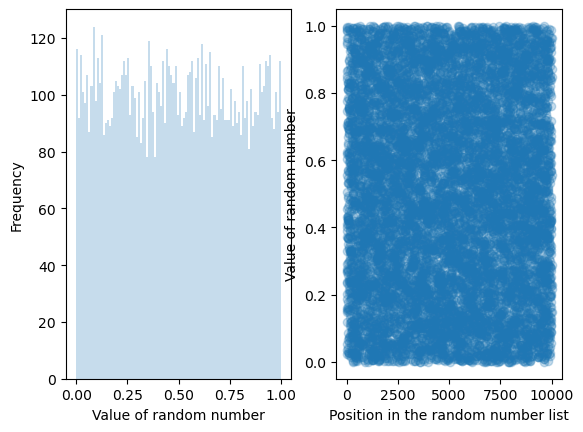

In [14]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

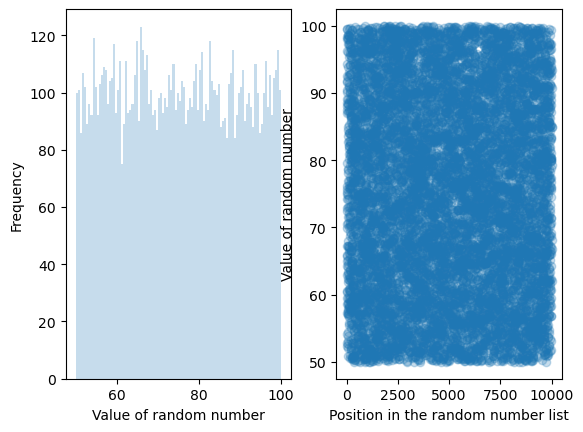

In [16]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)
fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [17]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([50, 37, 19,  0, 27, 17, 20, 46, 97, 23])

In [18]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([63, 27, 30, 57, 48, 97, 39, 19,  7, 25])

In [19]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [20]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [24]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Don't count on it.

Q: Will I be rich?
A: Outlook not so good.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [32]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [33]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Tails', 'Head',
       'Tails', 'Head', 'Tails'], dtype='<U5')

In [57]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads
no_of_coins = 1_0
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 50.00%


### 3.2 A biased coin

In [58]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 70.30%


### 3.3 A flipping experiment

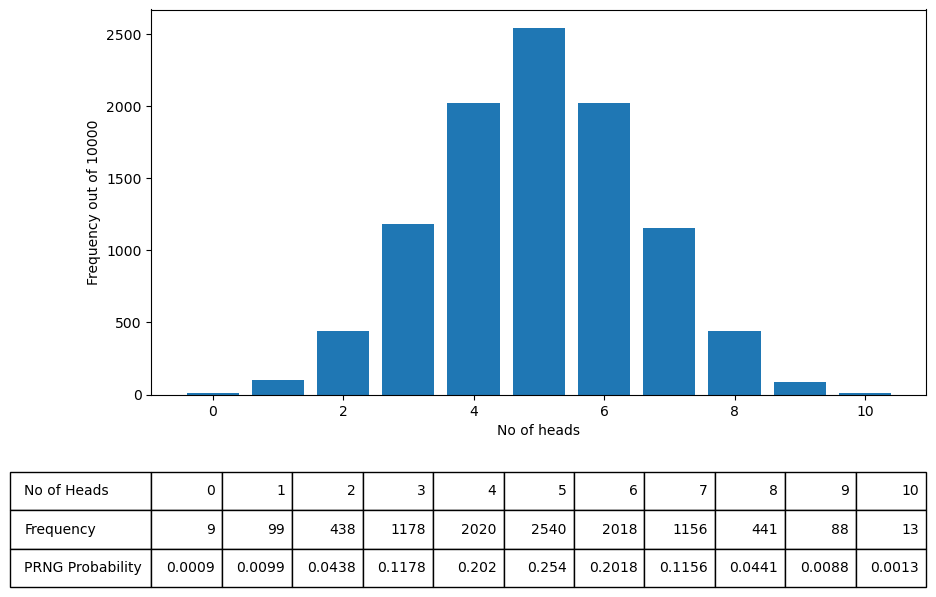

In [62]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [2]:
conda install -c anaconda scipy
from scipy.stats import binom

SyntaxError: invalid syntax (1225728915.py, line 1)

## Exercise 1 :  12C, 13C

In [1]:
def inspect(no_of_carbon, probability=.9889):
    results = np.random.rand(no_of_carbon)
    no_of_c13 = np.sum(results > probability)
    return no_of_c13

no_of_carbon = 27 * 6 * 10^23
no_of_c13 = inspect(no_of_carbon)
no_of_c12 = no_of_carbon - no_of_c13
print(f'Number of C13: {no_of_c13/no_of_carbon*100:.2f}%')
print(f'Number of C12: {no_of_c12/no_of_carbon*100:.2f}%')
print(f'mean number of C13: {no_of_c13}')

Number of C13: 1.06%
Number of C12: 98.94%
mean number of C13: 17
